# 01 - Exploratory Data Analysis

Stage 0 of the critique detection pipeline: load, validate, profile, and
visualize the YouTube comment dataset.

In [14]:
import sys
sys.path.insert(0, '../../nlp_pipeline')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_ingest import ingest, profile_data, save_profile
from src.preprocess import preprocess_dataframe

## Load and Validate Data

In [15]:
# Update this path to your input file
DATA_PATH = 'comments_merged.json'  # or .csv / .json

df = ingest(DATA_PATH)
profile = df.attrs.get('profile', profile_data(df))
print(f"Loaded {len(df)} comments")
print(f"\nProfile summary:")
for k, v in profile.items():
    if not isinstance(v, dict):
        print(f"  {k}: {v}")

[2026-02-24 22:13:48] src.data_ingest INFO: Ingesting comments_merged.json  (format=json)
[2026-02-24 22:13:50] src.data_ingest INFO: Loaded JSON  rows=84816
[2026-02-24 22:13:51] src.data_ingest INFO: Applying field aliases: {'cid': 'comment_id', 'votes': 'like_count', 'time_parsed': 'published_at'}
[2026-02-24 22:13:51] src.data_ingest INFO: Optional column 'video_id' not present; filling with None.
[2026-02-24 22:13:51] src.data_ingest INFO: Optional column 'language' not present; filling with None.
[2026-02-24 22:13:51] src.data_ingest INFO: 6207 rows contain emoji-only text.
[2026-02-24 22:13:53] src.data_ingest INFO: Schema validation complete.  84816 valid rows retained.
[2026-02-24 22:13:53] src.data_ingest INFO: Profiling complete: 84816 rows, 0 nulls in text, 0 duplicates.
[2026-02-24 22:13:53] src.data_ingest INFO: Ingestion complete: 84816 rows ingested from comments_merged.json.
[2026-02-24 22:13:53] src.data_ingest INFO: Profiling complete: 84816 rows, 0 nulls in text, 0 

Loaded 84816 comments

Profile summary:
  row_count: 84816
  duplicate_comment_ids: 0
  empty_text_count: 0
  emoji_only_count: 6207


## Preprocess

In [16]:
df = preprocess_dataframe(df)
print(f"Columns: {list(df.columns)}")
df.head()

Columns: ['comment_id', 'text', 'video_id', 'like_count', 'published_at', 'language', '_empty_text', '_emoji_only', 'raw_text', 'clean_text', 'is_trivial', 'text_length', 'word_count', 'punctuation_ratio', 'caps_ratio', 'emoji_count', 'exclamation_count', 'question_mark_count']


,comment_id,text,video_id,like_count,published_at,language,_empty_text,_emoji_only,raw_text,clean_text,is_trivial,text_length,word_count,punctuation_ratio,caps_ratio,emoji_count,exclamation_count,question_mark_count
0,UgzL_goLnxrrdlGfsCp4AaABAg,Who is here in 24 february 2026\n👇,None,355,1771896135.798376,en,False,False,Who is here in 24 february 2026\n👇,Who is here in 24 february 2026 👇,False,33,8,0.0000,0.0526,1,0,0
1,Ugyf_F_h0AcifouSB-Z4AaABAg,Guys I beat cancer 😊💪,None,8900,1770168135.799559,en,False,False,Guys I beat cancer 😊💪,Guys I beat cancer 😊💪,False,21,5,0.0000,0.1333,2,0,0
2,Ugy6ur_97aULs_zyBYh4AaABAg,Asking his wife to play the roll the song was ...,None,30000,1740446535.800537,en,False,False,Asking his wife to play the roll the song was ...,Asking his wife to play the roll the song was ...,False,84,15,0.0595,0.0308,0,0,0
3,UgyfV9T7fxqE29rJqsh4AaABAg,WHO'S HERE TO LISTEN TO THIS MASTERPIECE IN 20...,None,144,1771809735.801354,en,False,False,WHO'S HERE TO LISTEN TO THIS MASTERPIECE IN 20...,WHO'S HERE TO LISTEN TO THIS MASTERPIECE IN 20...,False,50,9,0.0200,1.0000,2,0,0
4,UgzHI5-kEBnvCgi3LwR4AaABAg,I’m 47 and haven’t found love yet. Pray for me...,None,5400,1745540535.803093,en,False,False,I’m 47 and haven’t found love yet. Pray for me...,I’m 47 and haven’t found love yet. Pray for me...,False,55,12,0.0909,0.0556,1,1,0


## Text Length Distribution

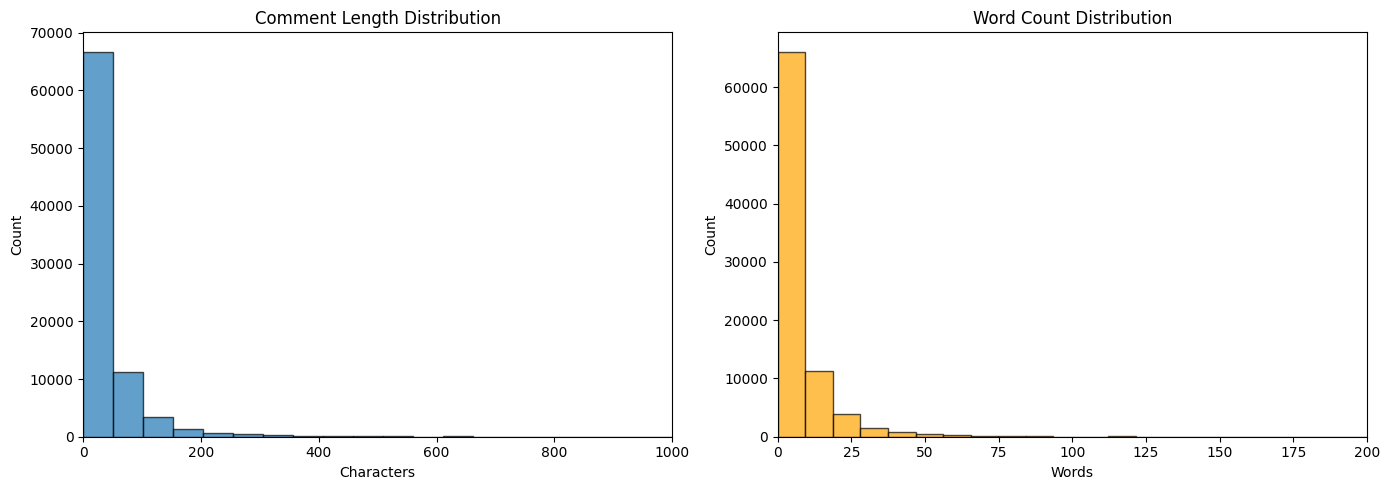

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['text_length'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Comment Length Distribution')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, 1000)

axes[1].hist(df['word_count'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Count')
axes[1].set_xlim(0, 200)

plt.tight_layout()
plt.show()

## Language Distribution

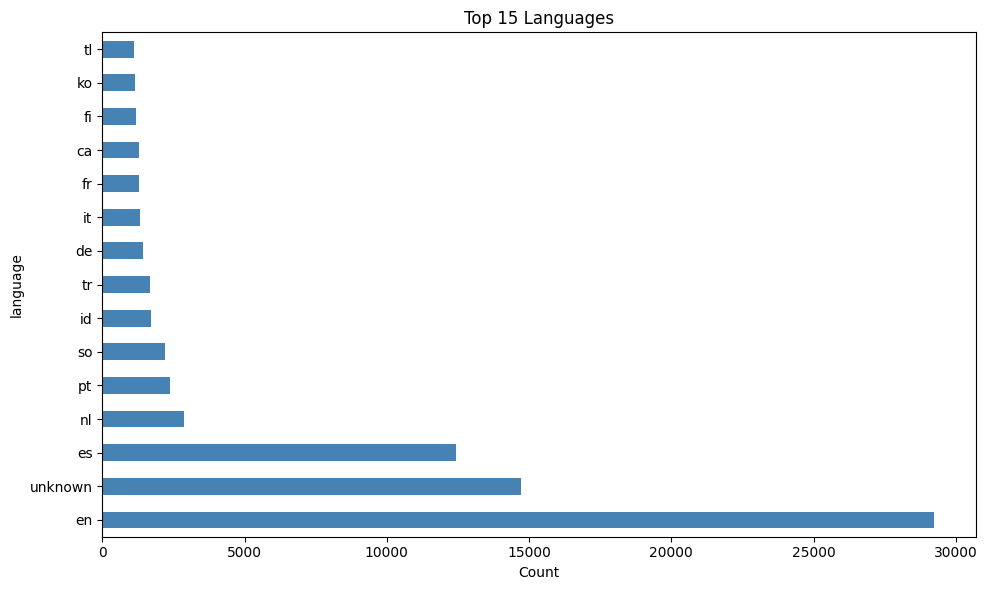

In [18]:
lang_counts = df['language'].value_counts().head(15)
lang_counts.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 15 Languages')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## Feature Correlations

In [19]:
feature_cols = ['text_length', 'word_count', 'punctuation_ratio', 'caps_ratio',
                'emoji_count', 'exclamation_count', 'question_mark_count']
df[feature_cols].describe().round(3)

,text_length,word_count,punctuation_ratio,caps_ratio,emoji_count,exclamation_count,question_mark_count
count,84816.000,84816.000,84816.000,84816.000,84816.000,84816.000,84816.000
mean,39.872,7.693,0.030,0.158,1.088,0.217,0.070
std,96.659,18.387,0.072,0.236,3.042,1.105,0.428
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6.000,1.000,0.000,0.018,0.000,0.000,0.000
50%,18.000,3.000,0.000,0.067,0.000,0.000,0.000
75%,44.000,8.000,0.033,0.167,1.000,0.000,0.000
max,5093.000,935.000,1.000,1.000,201.000,159.000,36.000


## Trivial/Empty Comment Stats

In [20]:
if 'is_trivial' in df.columns:
    trivial_pct = df['is_trivial'].mean() * 100
    print(f"Trivial comments: {df['is_trivial'].sum()} ({trivial_pct:.1f}%)")
if '_emoji_only' in df.columns:
    emoji_pct = df['_emoji_only'].mean() * 100
    print(f"Emoji-only comments: {df['_emoji_only'].sum()} ({emoji_pct:.1f}%)")

Trivial comments: 14464 (17.1%)
Emoji-only comments: 6207 (7.3%)
